<a href="https://colab.research.google.com/github/SurendharSSenthil/ML/blob/main/KMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class KMeansClustering:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol  # tolerance for convergence
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples, n_features = X.shape

        # Initialize centroids randomly from data points
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iter):
            # Assignment Step
            distances = self._compute_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)

            # Update Step
            new_centroids = np.array([
                X[labels == j].mean(axis=0) if len(X[labels == j]) > 0 else self.centroids[j]
                for j in range(self.n_clusters)
            ])

            # Convergence Check
            centroid_shift = np.linalg.norm(new_centroids - self.centroids, axis=1)
            if np.all(centroid_shift < self.tol):
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X, centroids):
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


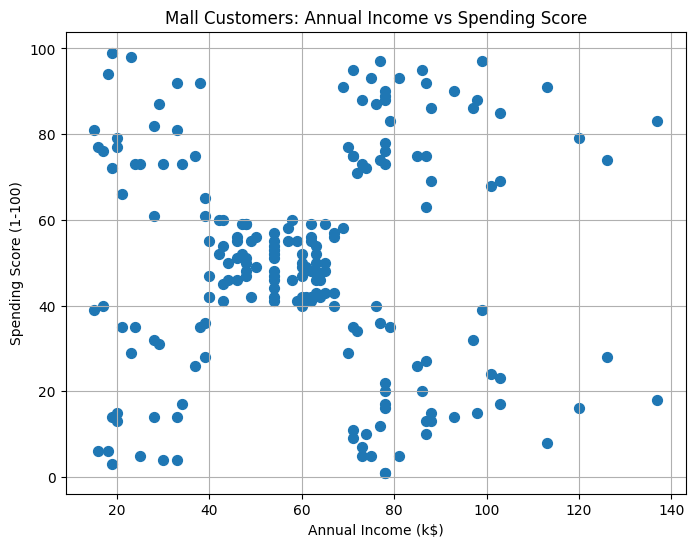

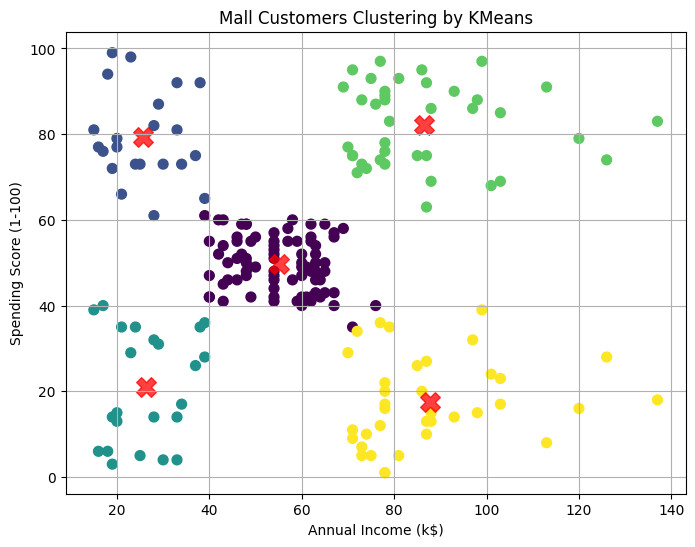

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = "./Mall_Customers.csv"
data = pd.read_csv(url)

print(data.head())

# Select features: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Plot the raw data
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=50)
plt.title('Mall Customers: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# Apply KMeansClustering
kmeans = KMeansClustering(n_clusters=5, random_state=42)
kmeans.fit(X)

# Plot clustering result
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Mall Customers Clustering by KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()
